In [1]:
import pandas as pd
import numpy as np
import math
%pylab inline
import scipy

Populating the interactive namespace from numpy and matplotlib


In [2]:
k = 100
m = 1
delta = 0.001

x = np.arange(-1-delta,1+delta,delta)

Атомарная функция up_m

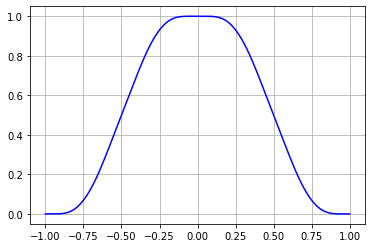

In [3]:
def fur_upm(x):
    y=1
    for i in range (1,k):
        t=x/((2*m)**i)
        sinc=sin(t)/t
        sincm=sin(m*t)/(m*t)
        y*=(sincm*sincm/sinc)
    return (y)

def upm(x):
    if math.fabs(x)>=1:
        return (0)
    y = 0.5
    for i in range (1,k):
        a=math.pi*i
        y+=fur_upm(a)*math.cos(a*x)
    return (y)

result = np.zeros((x.shape[0],2))

for i in range (x.shape[0]):
    result[i][0] = upm(x[i])
    result[i][1] = x[i]

#plt.figure(figsize=(5,5))
pylab.grid(True)
pylab.plot(result[:, 1], result[:, 0], 'b-')

Text(0, 0.5, 'dB')

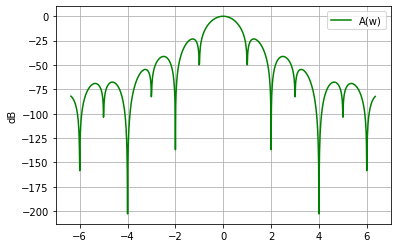

In [4]:
spectr=np.zeros((1000,2))
for i in range (1000):
    om=(-40+80*i/1000)
    if(om==0):
        spectr[i][0] = 0
        spectr[i][1] = 0
    else:
        spectr[i][0] = 20*math.log10(math.fabs(fur_upm(om)))
        spectr[i][1] = om/(2*math.pi)

#plt.figure(figsize=(5,5))
pylab.grid(True)
pylab.plot(spectr[:, 1], spectr[:, 0], 'g-', label='A(w)')
pylab.legend(loc='upper right')
pylab.ylabel('dB')

Производная up_m через уравнение

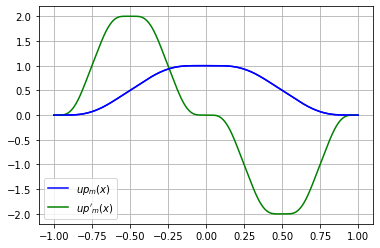

In [5]:
def der_upm(x):
    y = 0
    for i in range (1,m+1):
        t=2*m*x-2*i+1
        y += 2*(upm(t+2*m)-upm(t))
    return(y)

result = np.zeros((x.shape[0],2))

result[:, 1]

for i in range (x.shape[0]):
    result[i][0] = upm(x[i])
    result[i][1] = x[i]

derivative = np.zeros((x.shape[0],2))
for j in range (x.shape[0]):
    derivative[j][0] = der_upm(x[j])
    derivative[j][1] = x[j]

#plt.figure(figsize=(5,5))
pylab.grid(True)
pylab.plot(result[:, 1], result[:, 0], 'b-', label='$up_m(x)$')
pylab.plot(derivative[:, 1], derivative[:, 0], 'g-', label="$up'_m(x)$")
pylab.legend(loc='lower left')
pylab.plot(result[:, 1], result[:, 0], 'b-')

Производная up_m числененно 

-2.000000069185881


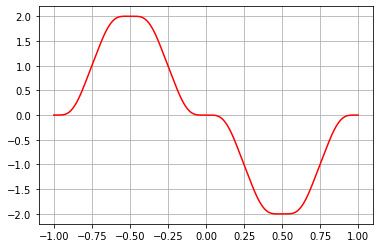

In [6]:
def dernum_upm(x):
    b = upm(x+delta)
    g = upm(x)
    if b==0 or g==0:
        return 0
    return ((b-g)/(delta))

numerical = np.zeros((x.shape[0],2))

for i in range (x.shape[0]):
    numerical[i][0] = dernum_upm(x[i])
    numerical[i][1] = x[i]

print(numerical[:,0].min())
    
pylab.grid(True)
pylab.plot(numerical[:, 1], numerical[:, 0], 'r-')

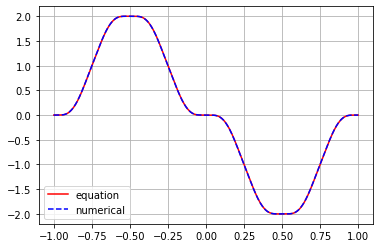

In [7]:
#plt.figure(figsize=(20,20))
pylab.grid(True)
pylab.plot(derivative[:, 1], derivative[:, 0], 'r-', label='equation') 
pylab.plot(numerical[:, 1], numerical[:, 0], 'b--', label='numerical') 
pylab.legend(loc='lower left')

Невязка r(x)

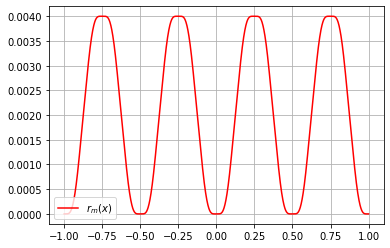

In [8]:
a = np.zeros((derivative.shape[0],2))

for i in range (derivative.shape[0]):
    a[i][0] = math.fabs(numerical[i][0] - derivative[i][0])
    a[i][1] = x[i]

#plt.figure(figsize=(10,10))
pylab.grid(True) 
pylab.plot(a[:, 1], a[:, 0], 'r-', label='$r_m(x)$') 
pylab.legend(loc='lower left')
#ylim((-0.1, +0.1))